In [4]:
import pandas as pd

resultados_exames = pd.read_csv('/content/exames.csv')

In [6]:
resultados_exames.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [11]:
resultados_exames.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
from numpy import random
SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns=['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size=0.3)

In [20]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators=100)
classificador.fit(treino_x, treino_y)

print(f'Resultado da classificação: {classificador.score(teste_x, teste_y)* 100:.2f}%')

Resultado da classificação: 92.40%


In [21]:
from sklearn.dummy import DummyClassifier
SEED = 123143
random.seed(SEED)

dummy = DummyClassifier(strategy= 'most_frequent')
dummy.fit(treino_x, treino_y)
print(f'Resultado da classificação Dummy: {dummy.score(teste_x, teste_y)* 100:.2f}%')

Resultado da classificação Dummy: 66.67%


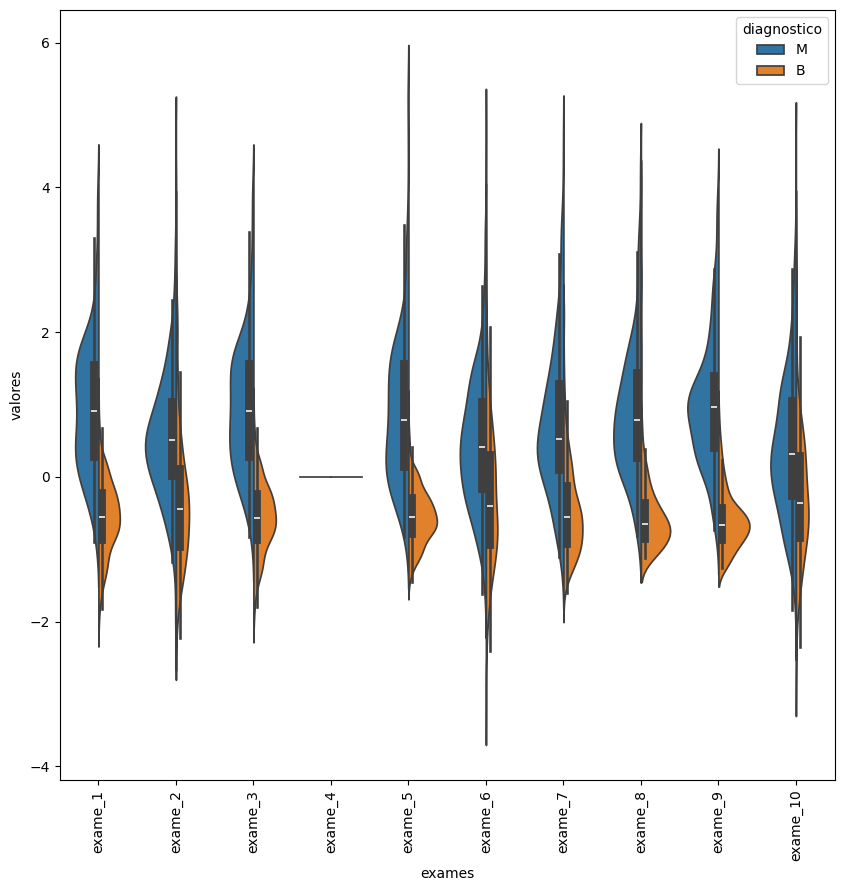

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns= valores_exames_v1.keys())


dados_plot = pd.concat([diagnostico, valores_exames_v2.iloc[:,0:10]], axis = 1)
dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

plt.figure(figsize=(10,10))
sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

plt.xticks(rotation = 90);

In [35]:
valores_exames_v1.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

In [37]:
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars='diagnostico', var_name='exames', value_name='valores')

  plt.figure(figsize=(10,10))
  sns.violinplot(x = 'exames', y = 'valores', hue = 'diagnostico', data = dados_plot, split=True)

  plt.xticks(rotation = 90);

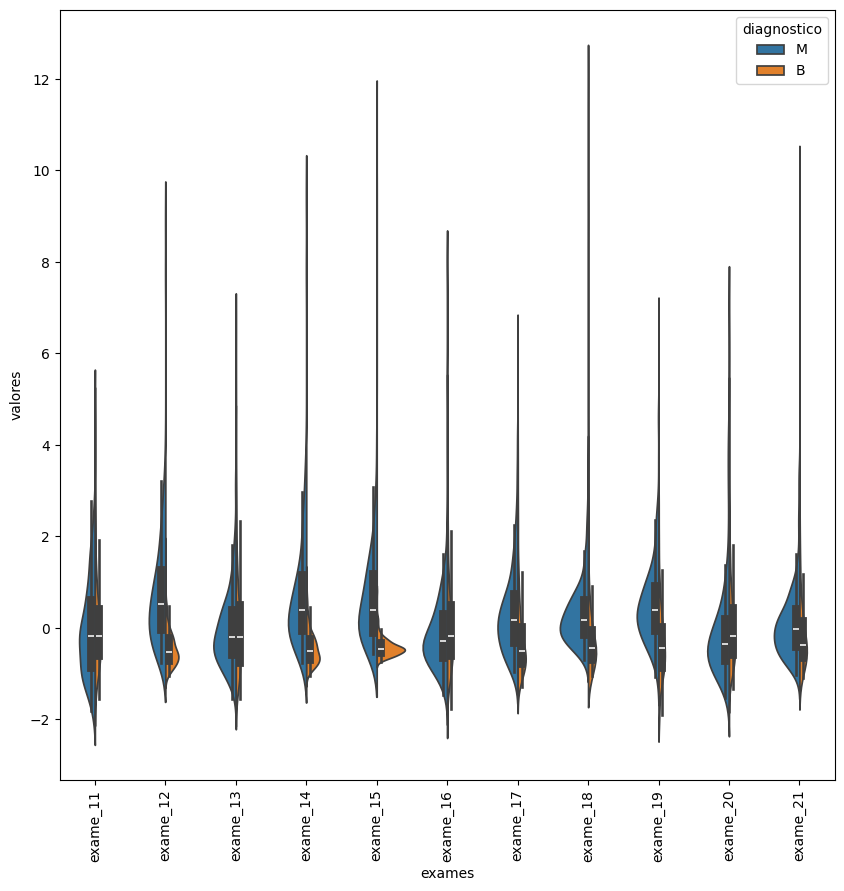

In [39]:
grafico_violino(valores_exames_v2,10,21)

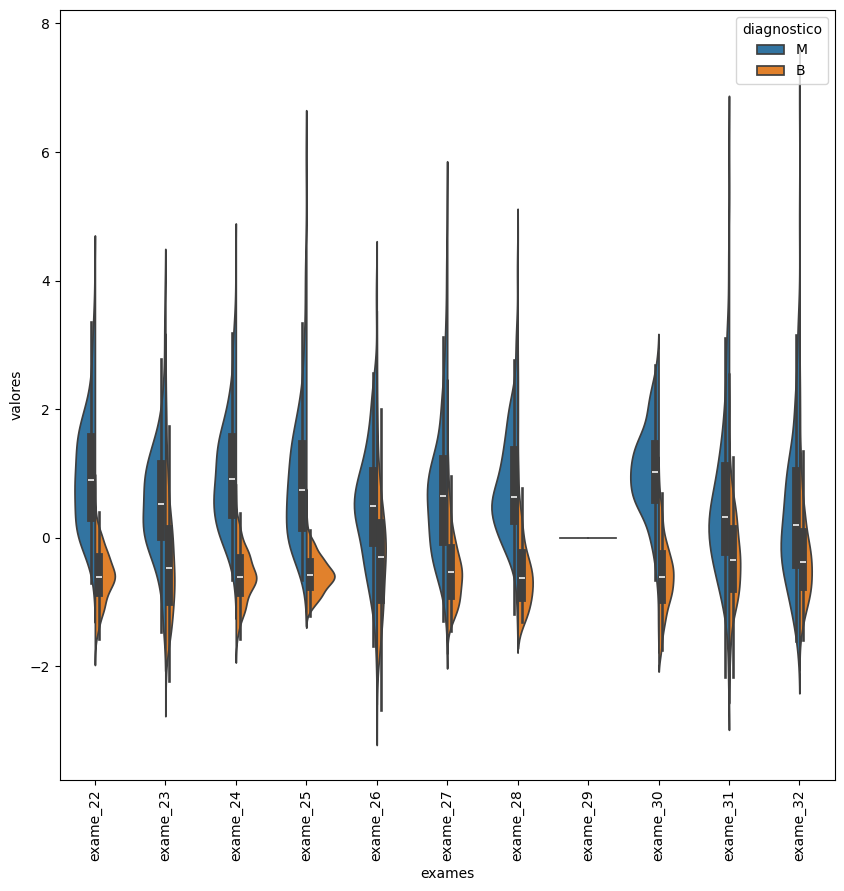

In [40]:
grafico_violino(valores_exames_v2,21,32)

In [41]:
valores_exames_v3 = valores_exames_v2.drop(columns=['exame_4','exame_29'])

In [42]:
def classificador_random_forest(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)

  print(f'Resultado da classificação: {classificador.score(teste_x, teste_y)* 100:.2f}%')

In [43]:
classificador_random_forest(valores_exames_v3)

Resultado da classificação: 92.98%


In [44]:
def classificador_dummy(valores):
  SEED = 123143
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, test_size=0.3)
  dummy = DummyClassifier(strategy= 'most_frequent')
  dummy.fit(treino_x, treino_y)
  print(f'Resultado da classificação Dummy: {dummy.score(teste_x, teste_y)* 100:.2f}%')

In [45]:
classificador_dummy(valores_exames_v3)

Resultado da classificação Dummy: 66.67%


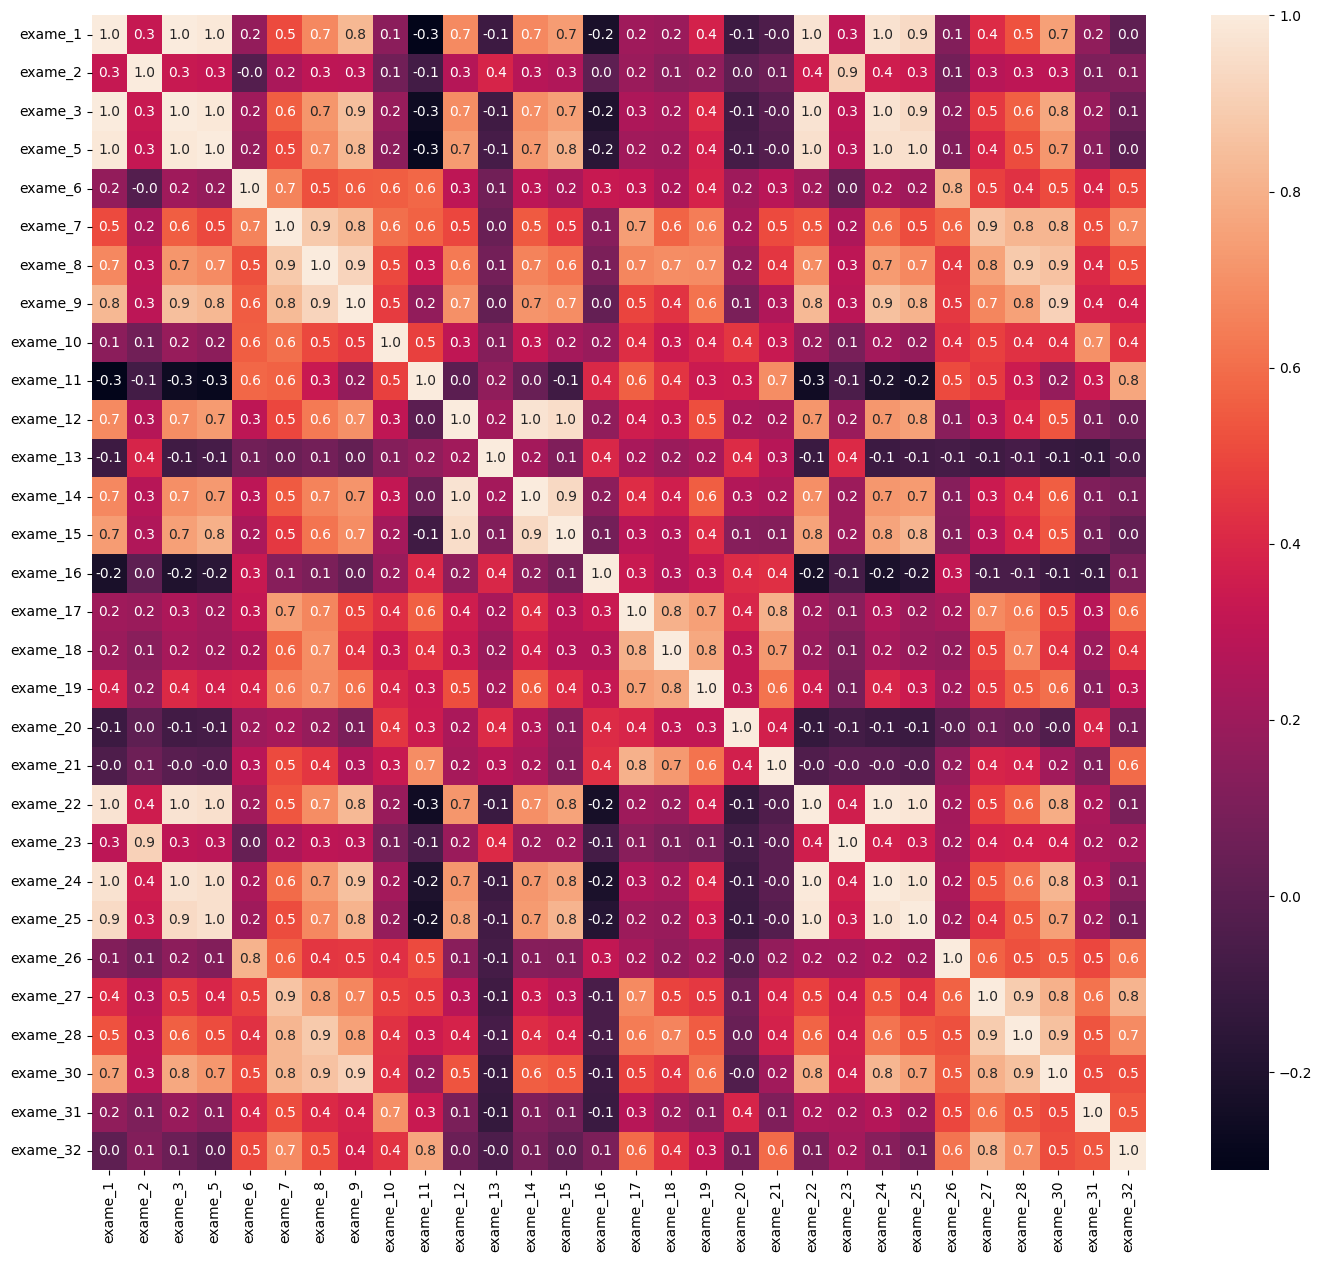

In [50]:
matriz_corr = valores_exames_v3.corr()
plt.figure(figsize= (17,15))
sns.heatmap(matriz_corr, annot = True, fmt = '.1f');

In [51]:
matriz_corr_v1 = matriz_corr[matriz_corr>0.99]

In [53]:
matriz_corr_v2 = matriz_corr_v1.sum()
matriz_corr_v2

exame_1     1.997855
exame_2     1.000000
exame_3     1.997855
exame_5     1.000000
exame_6     1.000000
exame_7     1.000000
exame_8     1.000000
exame_9     1.000000
exame_10    1.000000
exame_11    1.000000
exame_12    1.000000
exame_13    1.000000
exame_14    1.000000
exame_15    1.000000
exame_16    1.000000
exame_17    1.000000
exame_18    1.000000
exame_19    1.000000
exame_20    1.000000
exame_21    1.000000
exame_22    1.993708
exame_23    1.000000
exame_24    1.993708
exame_25    1.000000
exame_26    1.000000
exame_27    1.000000
exame_28    1.000000
exame_30    1.000000
exame_31    1.000000
exame_32    1.000000
dtype: float64

In [59]:
var_corr = matriz_corr_v2[matriz_corr_v2>1]
var_corr

exame_1     1.997855
exame_3     1.997855
exame_22    1.993708
exame_24    1.993708
dtype: float64

In [61]:
var_exames_v4 = valores_exames_v3.drop(columns=var_corr.keys())

In [62]:
classificador_random_forest(var_exames_v4)

Resultado da classificação: 91.81%


In [63]:
classificador_dummy(var_exames_v4)

Resultado da classificação Dummy: 66.67%


In [65]:
valores_exames_v5 = valores_exames_v3.drop(columns=['exame_3', 'exame_24'])

In [66]:
classificador_random_forest(valores_exames_v5)

Resultado da classificação: 92.98%


In [67]:
classificador_dummy(valores_exames_v5)

Resultado da classificação Dummy: 66.67%


In [68]:
from sklearn.feature_selection import SelectKBest, chi2

selecionar_kmelhores = SelectKBest(chi2, k = 5)

In [69]:
valores_exames_v6 = valores_exames_v1.drop(columns=['exame_4', 'exame_29', 'exame_3', 'exame_24'])

In [74]:
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)

selecionar_kmelhores.fit(treino_x, treino_y)
treino_kbest = selecionar_kmelhores.transform(treino_x)
teste_kbest = selecionar_kmelhores.transform(teste_x)

In [75]:
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_kbest, treino_y)

print("Resultado da classificação %.2f%%" % (classificador.score(teste_kbest, teste_y)* 100))

Resultado da classificação 92.40%


In [76]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_kbest))
matriz_confusao

array([[100,   5],
       [  8,  58]])

[Text(0.5, 19.049999999999997, 'Predição'), Text(46.25, 0.5, 'Real')]

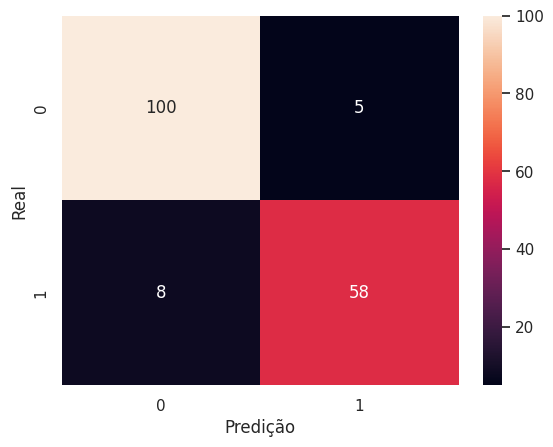

In [79]:
sns.set()
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

Resultado da classificação 90.06%


[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Real')]

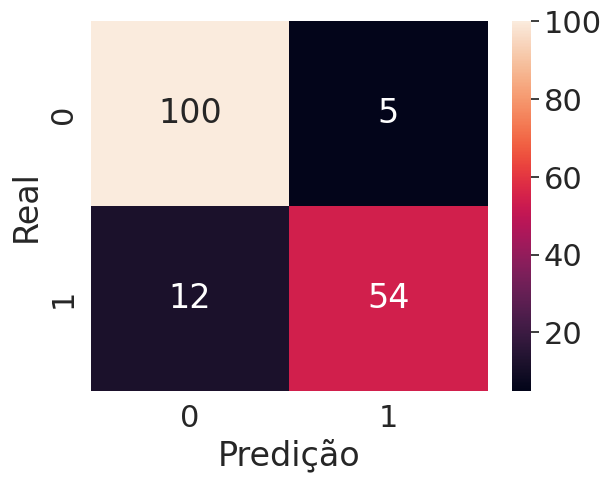

In [81]:
from sklearn.feature_selection import RFE
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x, treino_y)
selector_rfe = RFE(estimator = classificador, n_features_to_select = 5, step = 1)
selector_rfe.fit(treino_x, treino_y)
treino_rfe = selector_rfe.transform(treino_x)
teste_rfe = selector_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

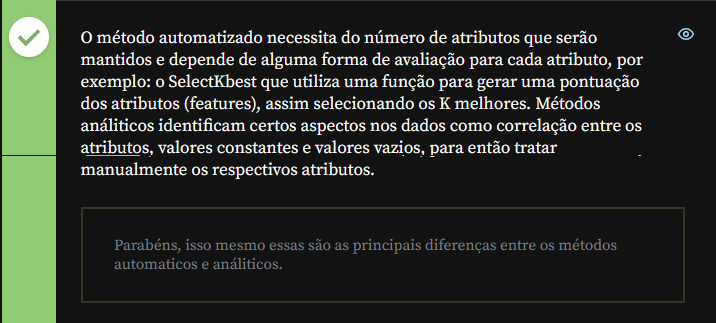

Resultado da classificação 92.98%


[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Real')]

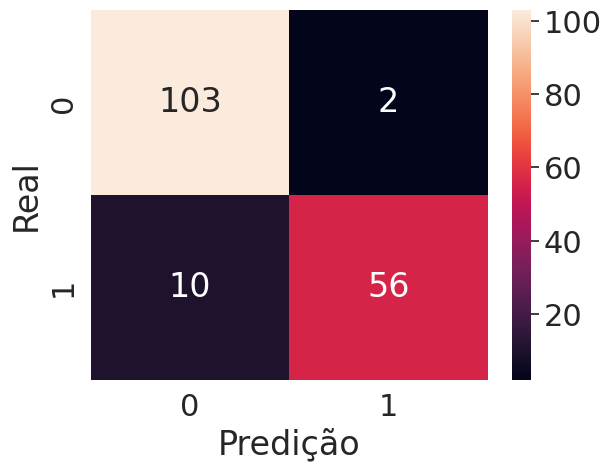

In [95]:
from sklearn.feature_selection import RFECV
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x, treino_y)
selector_rfecv = RFECV(estimator = classificador, cv = 5, step = 1, scoring='accuracy')
selector_rfecv.fit(treino_x, treino_y)
treino_rfecv = selector_rfecv.transform(treino_x)
teste_rfecv = selector_rfecv.transform(teste_x)
classificador.fit(treino_rfecv, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfecv, teste_y)* 100))
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfecv))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [96]:
selector_rfecv.n_features_

26

In [97]:
treino_x.columns[selector_rfecv.support_]

Index(['exame_1', 'exame_2', 'exame_5', 'exame_6', 'exame_7', 'exame_8',
       'exame_9', 'exame_10', 'exame_12', 'exame_13', 'exame_14', 'exame_15',
       'exame_16', 'exame_18', 'exame_19', 'exame_20', 'exame_21', 'exame_22',
       'exame_23', 'exame_25', 'exame_26', 'exame_27', 'exame_28', 'exame_30',
       'exame_31', 'exame_32'],
      dtype='object')

In [105]:
mean_test_scores = selector_rfecv.cv_results_['mean_test_score']
len(mean_test_scores)

28

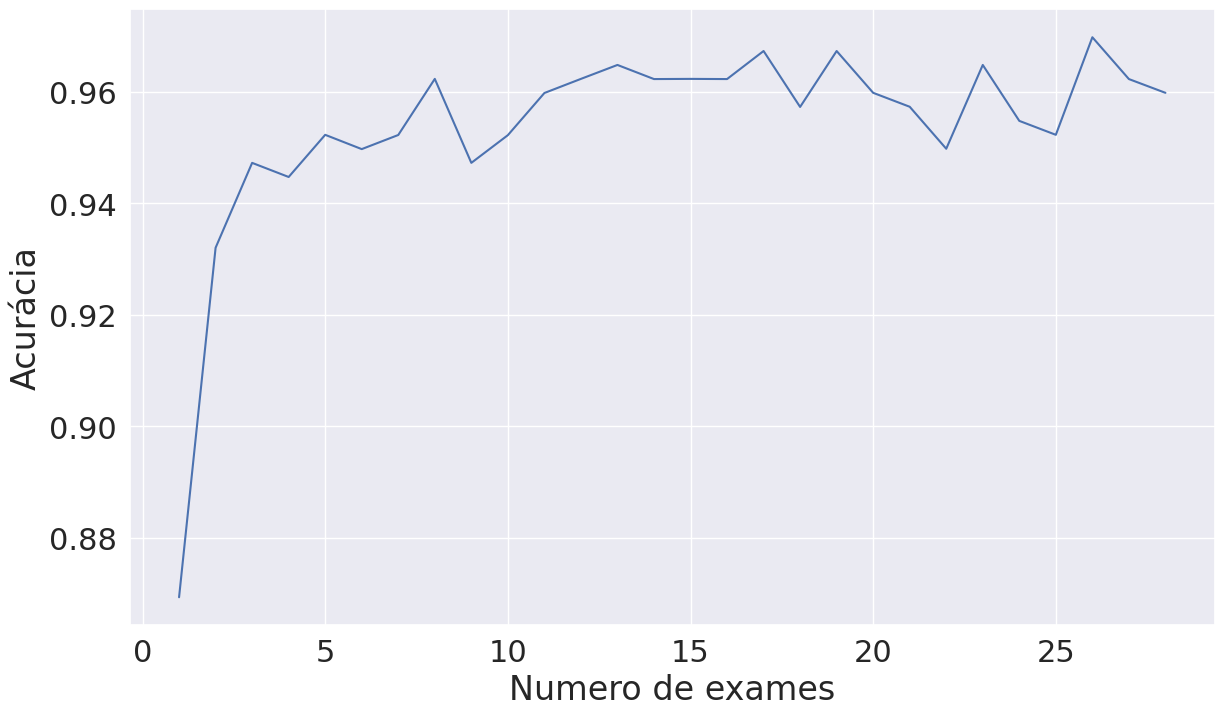

In [106]:
plt.figure(figsize = (14,8))
plt.xlabel('Numero de exames')
plt.ylabel('Acurácia')
plt.plot(range(1,len(mean_test_scores) +1), mean_test_scores)
plt.show()

Resultado da classificação 87.13%


[Text(0.5, 5.049999999999999, 'Predição'), Text(32.25, 0.5, 'Real')]

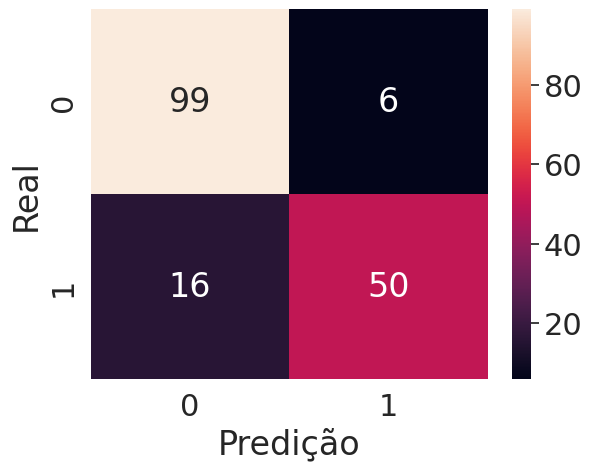

In [108]:
from sklearn.feature_selection import RFE
SEED = 1234
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v6, diagnostico, test_size=0.3)
classificador = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador.fit(treino_x, treino_y)
selector_rfe = RFE(estimator = classificador, n_features_to_select = 2, step = 1)
selector_rfe.fit(treino_x, treino_y)
treino_rfe = selector_rfe.transform(treino_x)
teste_rfe = selector_rfe.transform(teste_x)
classificador.fit(treino_rfe, treino_y)
print("Resultado da classificação %.2f%%" % (classificador.score(teste_rfe, teste_y)* 100))
matriz_confusao = confusion_matrix(teste_y, classificador.predict(teste_rfe))
sns.set(font_scale=2)
sns.heatmap(matriz_confusao, annot = True, fmt = 'd').set(xlabel = 'Predição', ylabel = 'Real')

In [109]:
valores_exames_v7 = selector_rfe.transform(valores_exames_v6)

<Axes: >

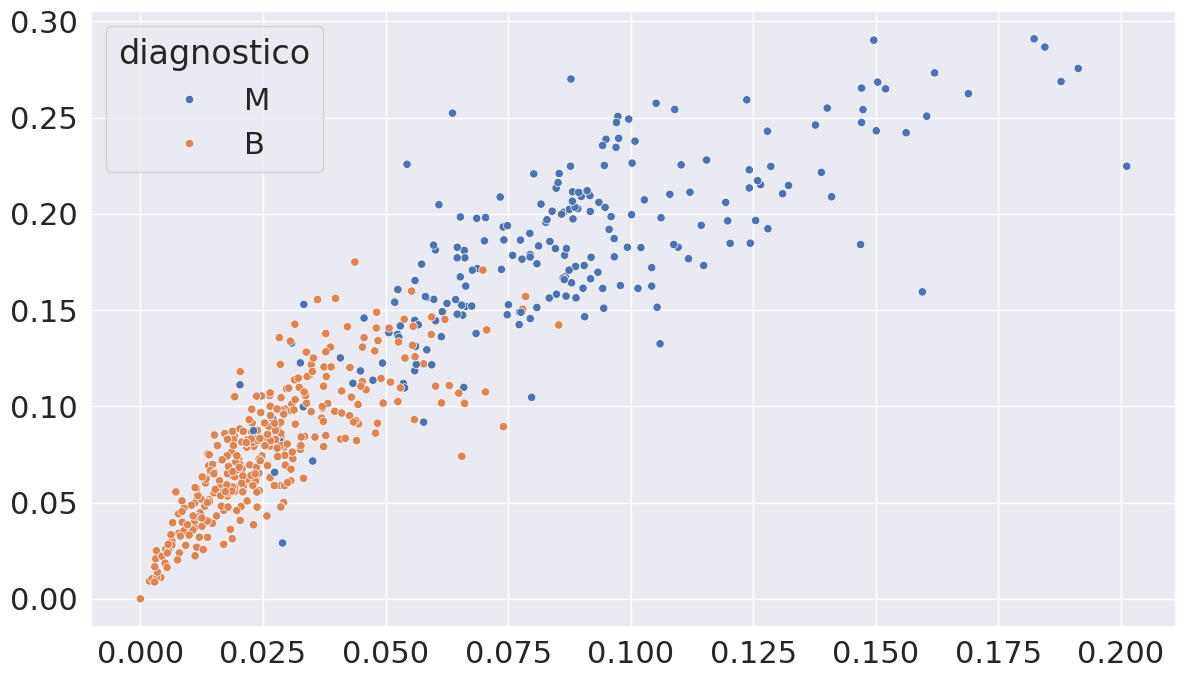

In [111]:
valores_exames_v7 = selector_rfe.transform(valores_exames_v6)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v7[:,0], y = valores_exames_v7[:,1], hue = diagnostico)

In [114]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
valores_exames_v8 = pca.fit_transform(valores_exames_v5)

<Axes: >

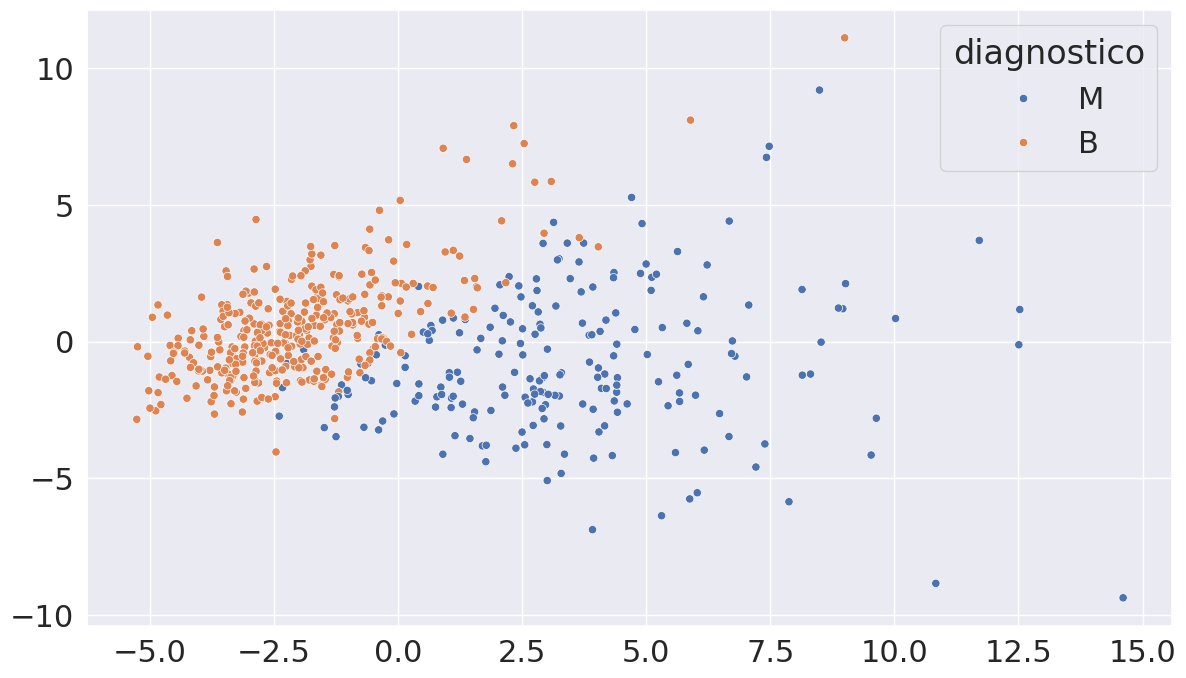

In [115]:
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v8[:,0], y = valores_exames_v8[:,1], hue = diagnostico)


<Axes: >

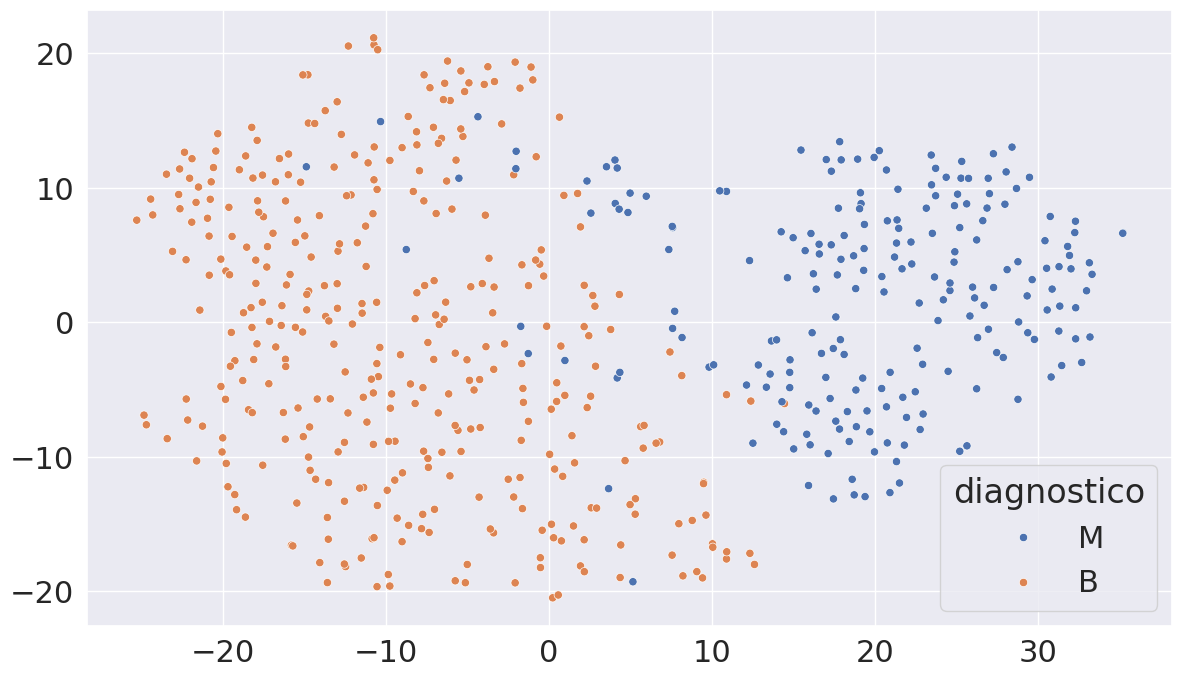

In [117]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2)
valores_exames_v9 = tsne.fit_transform(valores_exames_v5)
plt.figure(figsize=(14,8))
sns.scatterplot(x = valores_exames_v9[:,0], y = valores_exames_v9[:,1], hue = diagnostico)